We first import the required libraries:

In [1]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

Stock data is retrieved from the Yahoo Finance API:

In [2]:
IBM_yf = yf.Ticker('IBM')
IBM_hist = IBM_yf.history(period='max')

We can make a plot of this historical price:

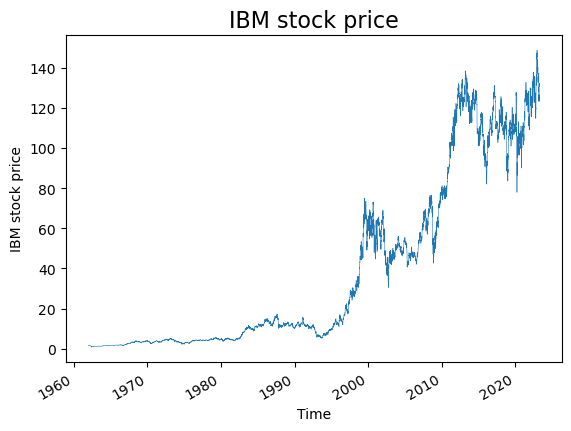

In [3]:
IBM_hist['Close'].plot(linewidth=0.4)
plt.title('IBM stock price', fontsize=16)
plt.xlabel('Time', fontsize=10)
plt.ylabel('IBM stock price', fontsize=10)
plt.show()

The following function will perform the Dickey-Fuller stationarity test:

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

We can apply the Dickey-Fuller to the daily stock close price, which should be higher than 0,05 to accept the H0 hypothesis of non-stationarity:

In [5]:
test_stationarity(IBM_hist['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    -0.040408
p-value                            0.955060
#Lags Used                        37.000000
Number of Observations Used    15384.000000
Critical Value (1%)               -3.430775
Critical Value (5%)               -2.861728
Critical Value (10%)              -2.566870
dtype: float64


The high p-value well above 0,05 shows that the series is non-stationarity. 

We can now **remove the heterodasticity** by applying the logarithm to the close price and test again to analyze the resulting p-value:

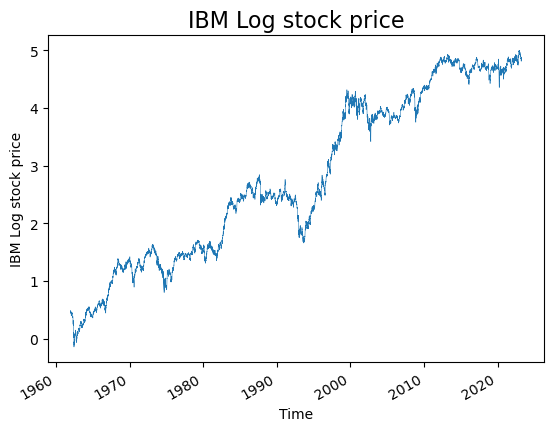

In [6]:
IBM_hist_log = np.log(IBM_hist.Close)
IBM_hist_log.plot(linewidth=0.4)
plt.title('IBM Log stock price', fontsize=16)
plt.xlabel('Time', fontsize=10)
plt.ylabel('IBM Log stock price', fontsize=10)
plt.show()

In [7]:
test_stationarity(IBM_hist_log)

Results of Dickey-Fuller Test:
Test Statistic                    -0.847378
p-value                            0.804808
#Lags Used                        26.000000
Number of Observations Used    15395.000000
Critical Value (1%)               -3.430775
Critical Value (5%)               -2.861728
Critical Value (10%)              -2.566870
dtype: float64


The value is still high, meaning the time series is still non-stationary.

The next step is to **remove the trend** by removing the close price of the previous day:

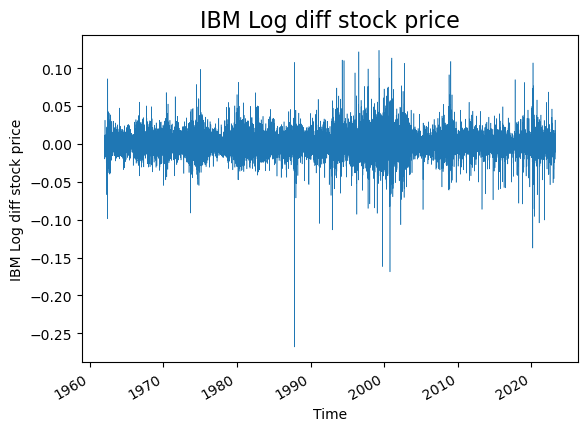

In [8]:
IBM_hist_log_diff = IBM_hist_log.diff(periods=1)
IBM_hist_log_diff.plot(linewidth=0.4)
plt.title('IBM Log diff stock price', fontsize=16)
plt.xlabel('Time', fontsize=10)
plt.ylabel('IBM Log diff stock price', fontsize=10)
plt.show()

In [9]:
test_stationarity(IBM_hist_log_diff.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                   -25.399502
p-value                            0.000000
#Lags Used                        25.000000
Number of Observations Used    15395.000000
Critical Value (1%)               -3.430775
Critical Value (5%)               -2.861728
Critical Value (10%)              -2.566870
dtype: float64


After removing heterodasticity and trend, the residues show a p-value below 0,05. Therefore, we can reject that the resulting series is not stationary and affirm that the residues **after removing heterodasticity and trend are stationary**.

As a conclusion, IBM stock price shows heterodasticity and trend, but **there is no seasonality**. Many stock strategies look for seasonality effects, such as the so-called **Santa's rally**, which **does not exist for the IBM price during the studied period**.